# Curve Fitting - Part 3

# Fitting data numerically to any general model

First, import packages.

In [2]:
import numpy as np #used for arrays and numerical functions
import pandas as pd #used for reading a data file
import matplotlib.pyplot as plt #used for graphing
from scipy.optimize import curve_fit #used for curve fitting

Python can use a general algorithm to compute the best-fit parameters for a given mathematical function. It works for any mathematical model, not just polynomials. However, for simplicity, the program below fits data with a linear model.

We defined the Python function `model()` which takes a value (or array) for the independent variable and the values of the parameters (coefficients) and returns the dependent variable.

The function `curve_fit()` from the `scipy.optimize` package finds the best-fit parameters (coefficients).

   concentration (g/L)  absorbance (arb)
0               0.2077             0.079
1               0.4154             0.164
2               1.0385             0.418
3               2.0770             0.827
4               4.1540             1.403
The best-fit function is y=mx + b where m=0.3365 and b=0.0471.


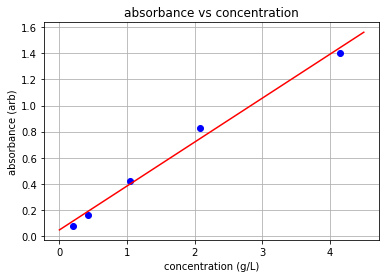

In [5]:
# create a Python function that contains the mathematical model for our fit
# x can be a single value or an array for the independent variable
#  m, b are a comma separated list of fit parameters
def model(x, m, b):
    y =  m*x + b
    return y


# read the data file
df = pd.read_csv('https://github.com/atitus/STLinATL/raw/master/workshop2/05-curve-fitting/absorbance-grape.txt', sep='\t')
print(df.head())

# define arrays for the data
xdata = df['concentration (g/L)']
ydata = df['absorbance (arb)']

# find best-fit parameters
initial_guess = [1, 1] #initial guess of m, b
parameters, stats = curve_fit(model, xdata, ydata, p0=initial_guess)
m, b = parameters
print("The best-fit function is y=mx + b where m={:.4f} and b={:.4f}.".format(m,b))

# create a set of points using the best-fit parameters so we can plot the best-fit function
xfit = np.linspace(0,4.5,100)
yfit = model(xfit, m, b)

# plot data and the best-fit function on the same graph
fig = plt.figure()
plt.title("absorbance vs concentration")
plt.xlabel('concentration (g/L)')
plt.ylabel('absorbance (arb)')
plt.grid(which='both', axis='both')
plt.plot(xdata, ydata, 'bo')
plt.plot(xfit, yfit, 'r-')
plt.show()


## Exercise

Find and plot the best-fit linear function for brain weight vs. body weight of various mammals. Data is in the file `brain-weight-body-height.txt`. ([data source](https://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt))

The program below defines the model, reads the data file, and finds the best-fit parameters. But it does not plot the data nor the best-fit function. Copy the appropriate code from a previous program and edit it to plot the data and best-fit function.

In [6]:
# create a Python function that contains the mathematical model for our fit
# x can be a single value or an array for the independent variable
#  m, b are a comma separated list of fit parameters
def model(x, m, b):
    y =  m*x + b
    return y


# read the data file
df = pd.read_csv('https://github.com/atitus/STLinATL/raw/master/workshop2/05-curve-fitting/brain-weight-body-height.txt', sep='\t')
print(df.head())

# define arrays for the data
xdata = df['Body Weight (lbs)']
ydata = df['Brain Weight (lbs)']

# find best-fit parameters
initial_guess = [1, 1] #initial guess of m, b
parameters, stats = curve_fit(model, xdata, ydata, p0=initial_guess)
m, b = parameters
print("The best-fit function is y = mx + b where m={:.4f} and b={:.4f}.".format(m,b))


   Body Weight (lbs)  Brain Weight (lbs)
0               44.5               3.385
1               15.5               0.480
2                8.1               1.350
3              423.0             465.000
4              119.5              36.330
The best-fit function is y = mx + b where m=0.6425 and b=-12.5605.


# Fitting an exponential decay

## Discharging Capacitor

A capacitor stores electrical potential energy by having oppositely charged parallel plates. Like a battery, there is a voltage across the capacitor. When the capacitor is connected to a resistor, the voltage decreases as a function of time. (In contrast, a battery maintains a constant voltage for a fairly long time when it is connected to a resistor.)

In this experiment, an initially charged capacitor is connected to a resistor, like a light bulb. At $t=0$, the circuit is connected, and a voltmeter is used to measure the voltage across the capacitor at 10 s intervals.

![](discharging-capacitor.png)

Data for the voltage as a function of time is in the file `discharging-capacitor.txt`. Let's read and plot the data.

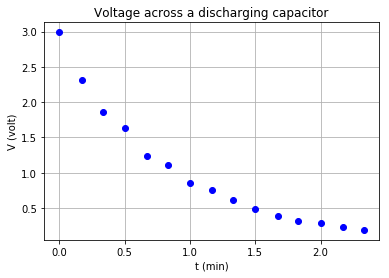

In [7]:
df = pd.read_csv('https://github.com/atitus/STLinATL/raw/master/workshop2/05-curve-fitting/discharging-capacitor.txt', sep='\t')

xdata = df['t (min)']
ydata = df['V (volt)']

plt.title('Voltage across a discharging capacitor')
plt.xlabel('t (min)')
plt.ylabel('V (volt)')
plt.grid(which='both', axis='both')
plt.plot(xdata,ydata,'bo')
plt.show()

When we look at this data, we might think "Aha! This looks like exponential decay." But we don't know it's exponential decay unless we do a curve fit. Also, a curve fit can give us the parameters for the best-fit function if indeed it is exponential decay as we expect.

A general exponential function $y(x)$ has the form

$$y=y_0e^{-rx}$$

where $y$ is the dependent variable, x is the independent variable, $r$ is the decay constant, and $y_0$ is the value of $y$ at $x=0$--this is called the initial value of y.

We will begin by creating a Python function that takes an array of independent values called `x` and constants `y_0` and `r` and calculates the corresponding dependent values `y` using a mathematical function or *model*, $y(x)$ which is in this case an exponential. The rest of the program is similar to what we wrote for a linear curve fit, except we use the fit parameters `y0` and `r`.

   t (min)  V (volt)
0     0.00      2.99
1     0.17      2.32
2     0.33      1.86
3     0.50      1.64
4     0.67      1.23
The best-fit function is y = y0*exp(-rx) where y0=2.9094 and r=1.2041.


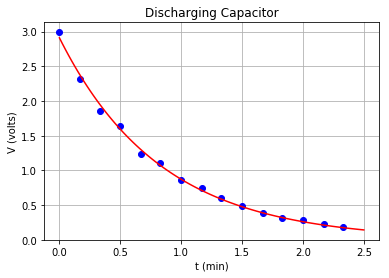

In [8]:
# create a Python function that contains the mathematical model for our fit
# x can be a single value or an array for the independent variable
def model(x, y0, r):
    y =  y0*np.exp(-r*x)
    return y

# read the data file
df = pd.read_csv('https://github.com/atitus/STLinATL/raw/master/workshop2/05-curve-fitting/discharging-capacitor.txt', sep='\t')
print(df.head())

# define arrays for the data
xdata = df['t (min)']
ydata = df['V (volt)']

# find best-fit parameters
initial_guess = [1, 1] #initial guess of m, b
parameters, stats = curve_fit(model, xdata, ydata, p0=initial_guess)
y0, r = parameters
print("The best-fit function is y = y0*exp(-rx) where y0={:.4f} and r={:.4f}.".format(y0,r))

# create a set of points using the best-fit parameters so we can plot the best-fit function
xfit = np.linspace(0,2.5,100)
yfit = model(xfit, y0, r)

# plot data and the best-fit function on the same graph
fig = plt.figure()
plt.title("Discharging Capacitor")
plt.xlabel('t (min)')
plt.ylabel('V (volts)')
plt.grid(which='both', axis='both')
plt.plot(xdata, ydata, 'bo')
plt.plot(xfit, yfit, 'r-')
plt.show()


## Exercise

Read the [NIST DanWood data set](http://www.itl.nist.gov/div898/strd/nls/data/daniel_wood.shtml) from the file `DanWood.txt`. Calculate and graph best-fit curves using each of the following mathematical models.

  $$y=a_1+a_2x$$
  $$y=a_1+a_2x^2$$
  $$y=a_1+a_2x^3$$
  $$y=a_1+a_2x^4$$
  
  Which model is closest to fitting the data?

## Exercise

For the previous exercise with the DanWood data set, do a curve fit with the model

  $$y=a_1+a_2x^n$$
  
  where $n$ is a fit parameter, and let scipy's `curve_fit()` funtion find the value of $n$ that best fits the data. Compare your results to those reported [at NIST](http://www.itl.nist.gov/div898/strd/nls/data/LINKS/v-daniel_wood.shtml).